In [127]:
import asdf
import h5py
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt
import os

In [129]:
# Initial condition pk
f = h5py.File(f"LastJourney_halo_pks/pk_42.hdf5", "r")
pk_icic = f['pk_ii'][:]
ind = pk_icic[:,0] < 1.
np.save('LastJourneyData/Pk_ICIC.npy',pk_icic[:,1][ind])

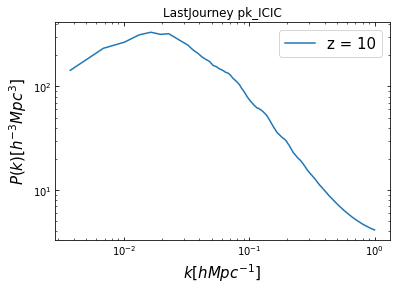

In [126]:
plt.figure(figsize = (6,4))
plt.title('LastJourney pk_ICIC')
plt.loglog(pk_icic[:,0][ind],pk_icic[:,1][ind],label = 'z = 10')
plt.xlabel(r'$k[hMpc^{-1}]$',fontsize = 15)
plt.ylabel(r'$P(k) [h^{-3}Mpc^3]$',fontsize = 15)
plt.legend(fontsize = 15)

In [90]:
steps = [331,338,347,355,365,373,382,392,401]

save_dir = 'LastJourneyData/'
def get_z(step):
    # get redshift for each snap shot
    # LS start from a = 1/201 to 1 with 500 linearly spaced steps 
    a_step = 1/201. + (1 - 1/201.)/500 * (step + 1)
    z_step = 1/a_step - 1

    return(z_step)

for s in steps:
    redshift = get_z(s)
    power_dict = {}
    with h5py.File(f"LastJourney_halo_pks/pk_{s}.hdf5", "r") as f:
        filename = f"power_mat_z{redshift:.3f}.asdf"
        # All pk files have the following format:
        # column 0: ks [h Mpc^-1]
        # column 1: pk [(h^-1 Mpc)^3]
        # column 2: number of k modes in bin
        # matter-matter auto-spectrum
        pks_mm = f['pk_mm'][:]
        pks_mi = f['pk_mi'][:]
        ks = pks_mm[:,0]
        pk_mm = pks_mm[:,1]
        pk_mi = f['pk_mi'][:,1]
        k_mask = (ks < 1)

        power_dict['Pk_mm'] = pk_mm[k_mask]
        power_dict['Pk_mIC'] = pk_mi[k_mask]
        power_dict['ks'] = ks[k_mask]
        data_tree = {}
        data_tree['data'] = power_dict
        output_file = asdf.AsdfFile(data_tree)
        output_file.write_to(os.path.join(save_dir,filename))
        print('Write to ' + os.path.join(save_dir,filename) )
        output_file.close()

Write to LastJourneyData/power_mat_z0.502.asdf
Write to LastJourneyData/power_mat_z0.471.asdf
Write to LastJourneyData/power_mat_z0.434.asdf
Write to LastJourneyData/power_mat_z0.402.asdf
Write to LastJourneyData/power_mat_z0.364.asdf
Write to LastJourneyData/power_mat_z0.335.asdf
Write to LastJourneyData/power_mat_z0.304.asdf
Write to LastJourneyData/power_mat_z0.271.asdf
Write to LastJourneyData/power_mat_z0.242.asdf


In [111]:
steps = [331,338,347,355,365,373,382,392,401]
for s in steps:
    redshift = get_z(s)
    power_dict = {}
    with h5py.File(f"LastJourney_halo_pks/pk_{s}.hdf5", "r") as f:
        #filename = f"power_mat_z{redshift:.3f}.asdf"
        mb = 2
        filename = f"power_halo_{mb+1}_z{redshift:.3f}.asdf"
        # All pk files have the following format:
        # column 0: ks [h Mpc^-1]
        # column 1: pk [(h^-1 Mpc)^3]
        # column 2: number of k modes in bin
        # matter-matter auto-spectrum
       
        ds_hh = f[f'pk_hh_massbin_{mb}'][:]  # auto-spectra dataset
        ds_hm = f[f'pk_hm_massbin_{mb}'][:]  # cross-spectra dataset
        ds_hi = f[f'pk_hi_massbin_{mb}'][:]  # cross-spectra dataset
        ks = ds_hh[:,0]
        pk_hh = ds_hh[:,1]
        pk_hi = ds_hi[:,1]
        pk_hm = ds_hm[:,1]
        k_mask = (ks < 1)

        power_dict['Pk_hh'] = pk_hh[k_mask]
        power_dict['Pk_hm'] = pk_hm[k_mask]
        power_dict['Pk_hIC'] = pk_hi[k_mask]
        data_tree = {}
        data_tree['data'] = power_dict
        output_file = asdf.AsdfFile(data_tree)
        output_file.write_to(os.path.join(save_dir,filename))
        print('Write to ' + os.path.join(save_dir,filename) )
        output_file.close()

Write to LastJourneyData/power_halo_3_z0.502.asdf
Write to LastJourneyData/power_halo_3_z0.471.asdf
Write to LastJourneyData/power_halo_3_z0.434.asdf
Write to LastJourneyData/power_halo_3_z0.402.asdf
Write to LastJourneyData/power_halo_3_z0.364.asdf
Write to LastJourneyData/power_halo_3_z0.335.asdf
Write to LastJourneyData/power_halo_3_z0.304.asdf
Write to LastJourneyData/power_halo_3_z0.271.asdf
Write to LastJourneyData/power_halo_3_z0.242.asdf
